# Estimación de Z a partir de los índices de color...

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [2]:
# load the data
data = np.load('sdss_galaxy_colors.npy')

In [3]:
print(data)

[(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05)
 (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05)
 (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05)
 ...
 (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05)
 (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04)
 (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)]


In [4]:
df = pd.DataFrame(data)

In [5]:
df

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018
...,...,...,...,...,...,...,...,...
49995,18.78195,17.36771,16.62808,16.24659,15.97817,b'GALAXY',0.078153,0.000031
49996,19.65251,17.59881,16.63644,16.19178,15.85334,b'GALAXY',0.079438,0.000020
49997,19.82667,18.10038,17.16133,16.57960,16.19755,b'GALAXY',0.078459,0.000022
49998,19.98672,19.75385,19.57130,19.27739,19.25895,b'QSO',1.567295,0.000451


In [6]:
def get_features_targets(data):
  # complete this function
  features = np.zeros(shape=(len(df), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

In [7]:
# call our function 
features, targets = get_features_targets(data)

In [8]:
features

array([[3.14760e-01, 5.71000e-02, 2.89910e-01, 7.19200e-02],
       [1.20020e+00, 8.20260e-01, 4.52940e-01, 2.46650e-01],
       [1.65941e+00, 8.34990e-01, 4.04820e-01, 3.12660e-01],
       ...,
       [1.72629e+00, 9.39050e-01, 5.81730e-01, 3.82050e-01],
       [2.32870e-01, 1.82550e-01, 2.93910e-01, 1.84400e-02],
       [1.90670e-01, 3.65500e-02, 4.63900e-02, 2.30000e-04]])

In [9]:
targets

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

# Se crean los loops para validar el hiperparámetro óptimo:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=20, test_size=0.2)

In [11]:
training_accuracy = []
test_accuracy = []

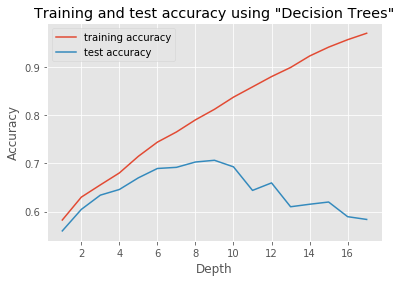

In [12]:
from sklearn.tree import DecisionTreeRegressor

depth_set = range(1, 18)
for depth in depth_set:
    # se construye el modelo de clasificacion
    clf = DecisionTreeRegressor(max_depth=depth)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "Decision Trees"')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

Caso Optimo:

In [13]:
start = time.time()

# Fit regression model
regressor = DecisionTreeRegressor(max_depth=5)

regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.0 min / 0.08 sec


0.6698160482378341

Ahora usando Random Forest:

In [16]:
training_accuracy = []
test_accuracy = []

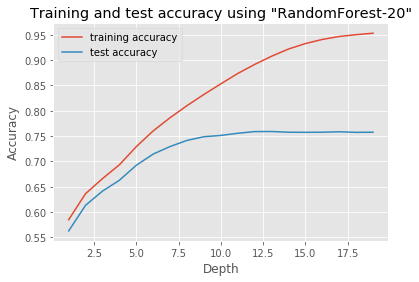

In [17]:
from sklearn.ensemble import RandomForestRegressor

depth_set = range(1, 20)
for depth in depth_set:
    # se construye el modelo de clasificacion
    clf = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "RandomForest-20"')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

Caso Optimo:

In [18]:
start = time.time()

# Fit regression model
regressor = RandomForestRegressor(n_estimators=20,max_depth=5, random_state=0)

regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.01 min / 0.89 sec


0.692574078056916

In [19]:
training_accuracy = []
test_accuracy = []

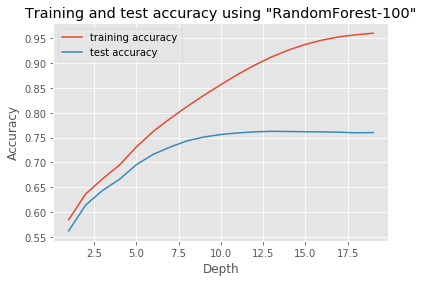

In [20]:
from sklearn.ensemble import RandomForestRegressor

depth_set = range(1, 20)
for depth in depth_set:
    # se construye el modelo de clasificacion
    clf = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "RandomForest-100"')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

Caso Optimo:

In [21]:
start = time.time()

# Fit regression model
regressor = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=0)

regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.07 min / 4.42 sec


0.6954944723589094

Ahora con AdaBoost:

In [22]:
training_accuracy = []
test_accuracy = []

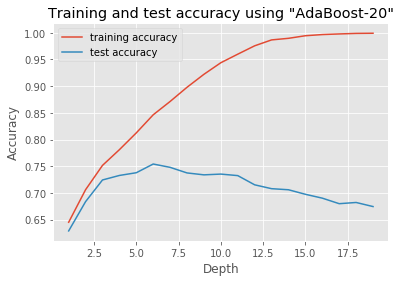

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

depth_set = range(1, 20)
for depth in depth_set:
    # se construye el modelo de clasificacion
    clf = GradientBoostingRegressor(n_estimators=15, learning_rate=0.3, max_depth=depth, random_state=0, loss='ls')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "AdaBoost-20"')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

Caso Optimo:

In [24]:

# Fit regression model

start = time.time()

regressor = GradientBoostingRegressor(n_estimators=20, learning_rate=0.3, max_depth=3, random_state=0, loss='ls')

regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.0 min / 0.28 sec


0.7276815517143225

In [25]:
training_accuracy = []
test_accuracy = []

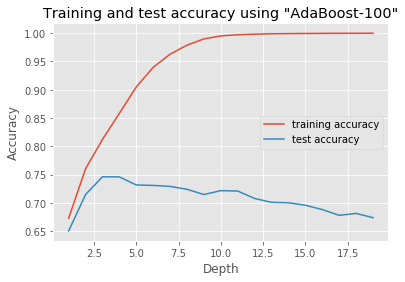

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

depth_set = range(1, 20)
for depth in depth_set:
    # se construye el modelo de clasificacion
    clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=depth, random_state=0, loss='ls')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "AdaBoost-100"')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

In [27]:
# Fit regression model

start = time.time()

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0, loss='ls')

regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.02 min / 1.21 sec


0.7461857662329999

In [28]:
training_accuracy = []
test_accuracy = []

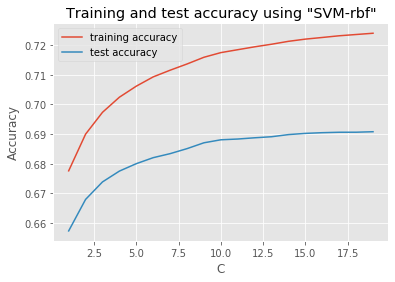

In [29]:
from sklearn import svm

C_set = range(1, 20)
for C in C_set:
    # se construye el modelo de clasificacion
    clf = svm.SVR(C=C, kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(depth_set, training_accuracy, label="training accuracy")
plt.plot(depth_set, test_accuracy, label="test accuracy")
plt.title('Training and test accuracy using "SVM-rbf"')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

In [30]:
from sklearn import svm

# Fit regression model
start = time.time()

regressor = svm.SVR(C= 2, kernel='rbf', gamma='scale')
regressor.fit(X_train, y_train)

# Predict
y_out = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print(f"Test time: {m} min / {s} sec")

score

Test time: 0.15 min / 8.9 sec


0.6679765817840995

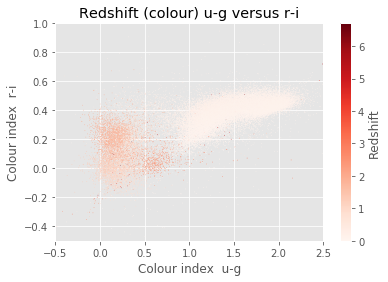

In [31]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Complete the following to make the plot
data = np.load('sdss_galaxy_colors.npy')
# Get a colour map
cmap = plt.get_cmap('Reds')

# Define our colour indexes u-g and r-i
u_g = data['u'] - data['g']
r_i = data['r'] - data['i']

# Make a redshift array
redshift = data['redshift']

# Create the plot with plt.scatter
plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

cb = plt.colorbar(plot)
cb.set_label('Redshift')

# Define your axis labels and plot title
plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()

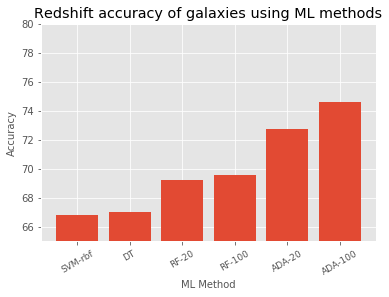

In [32]:
label = ['SVM-rbf', 'DT', 'RF-20', 'RF-100', 'ADA-20', 'ADA-100']
result = [66.79,66.98,69.25,69.54,72.76,74.61]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, result)
    plt.xlabel('ML Method', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=9, rotation=30)
    plt.ylim([65, 80])
    plt.title('Redshift accuracy of galaxies using ML methods')
    plt.show()
    
plot_bar_x()

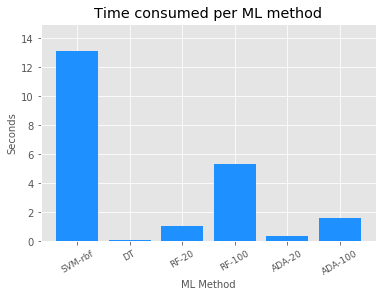

In [33]:
label = ['SVM-rbf', 'DT', 'RF-20', 'RF-100', 'ADA-20', 'ADA-100']
result = [13.15,0.09,1.05,5.30,0.37,1.63]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, result,color='dodgerblue')
    plt.xlabel('ML Method', fontsize=10)
    plt.ylabel('Seconds', fontsize=10)
    plt.xticks(index, label, fontsize=9, rotation=30)
    plt.ylim([0, 15])
    plt.title('Time consumed per ML method')
    plt.show()
    
plot_bar_x()